In [199]:
import pandas as pd

In [201]:
import matplotlib.pyplot as plt

In [203]:
from sklearn.model_selection import train_test_split

In [205]:
from sklearn.linear_model import LinearRegression

In [207]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [209]:
df = pd.read_csv("international_matches.csv")

In [211]:
df.head()

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
0,1993-08-08,Bolivia,Uruguay,South America,South America,59,22,0,0,3,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-08-08,Brazil,Mexico,South America,North America,8,14,0,0,1,...,No,Draw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-08-08,Ecuador,Venezuela,South America,South America,35,94,0,0,5,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993-08-08,Guinea,Sierra Leone,Africa,Africa,65,86,0,0,1,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1993-08-08,Paraguay,Argentina,South America,South America,67,5,0,0,1,...,No,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [213]:
df.shape

(23921, 25)

In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23921 entries, 0 to 23920
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   date                           23921 non-null  object 
 1   home_team                      23921 non-null  object 
 2   away_team                      23921 non-null  object 
 3   home_team_continent            23921 non-null  object 
 4   away_team_continent            23921 non-null  object 
 5   home_team_fifa_rank            23921 non-null  int64  
 6   away_team_fifa_rank            23921 non-null  int64  
 7   home_team_total_fifa_points    23921 non-null  int64  
 8   away_team_total_fifa_points    23921 non-null  int64  
 9   home_team_score                23921 non-null  int64  
 10  away_team_score                23921 non-null  int64  
 11  tournament                     23921 non-null  object 
 12  city                           23921 non-null 

In [217]:
df.describe()

,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,away_team_score,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
count,23921.000000,23921.000000,23921.000000,23921.000000,23921.000000,23921.000000,8379.000000,8095.000000,7787.000000,8510.000000,8162.000000,7564.000000,8312.000000,7979.000000
mean,77.854688,80.797375,323.401488,315.453576,1.609214,1.068266,74.963838,74.212477,74.903249,75.818743,75.889292,74.424379,75.420019,75.259143
std,52.355225,53.232902,500.825725,490.944273,1.630127,1.263944,8.212242,8.225919,6.003114,6.268416,6.053110,5.937425,6.201906,6.124573
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,47.000000,47.000000,52.800000,53.300000,54.200000,52.800000,53.300000,54.200000
25%,33.000000,36.000000,0.000000,0.000000,0.000000,0.000000,70.000000,69.000000,71.000000,71.700000,72.500000,70.500000,71.300000,71.800000
50%,71.000000,73.000000,0.000000,0.000000,1.000000,1.000000,75.000000,74.000000,75.200000,75.700000,76.200000,74.500000,75.300000,75.500000
75%,115.000000,119.000000,547.000000,523.000000,2.000000,2.000000,81.000000,80.000000,78.800000,80.000000,79.500000,78.200000,79.700000,79.000000
max,211.000000,211.000000,2164.000000,2164.000000,31.000000,21.000000,97.000000,97.000000,91.800000,93.000000,93.200000,91.800000,93.000000,93.200000


In [219]:
df.isnull().sum()

date                                 0
home_team                            0
away_team                            0
home_team_continent                  0
away_team_continent                  0
home_team_fifa_rank                  0
away_team_fifa_rank                  0
home_team_total_fifa_points          0
away_team_total_fifa_points          0
home_team_score                      0
away_team_score                      0
tournament                           0
city                                 0
country                              0
neutral_location                     0
shoot_out                            0
home_team_result                     0
home_team_goalkeeper_score       15542
away_team_goalkeeper_score       15826
home_team_mean_defense_score     16134
home_team_mean_offense_score     15411
home_team_mean_midfield_score    15759
away_team_mean_defense_score     16357
away_team_mean_offense_score     15609
away_team_mean_midfield_score    15942
dtype: int64

In [221]:
df = df.dropna(how="all")

In [223]:
num_cols = df.select_dtypes(include="number").columns

In [225]:
df[num_cols] = df[num_cols].fillna(0)

In [227]:
df.head()

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
0,1993-08-08,Bolivia,Uruguay,South America,South America,59,22,0,0,3,...,No,Win,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1993-08-08,Brazil,Mexico,South America,North America,8,14,0,0,1,...,No,Draw,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1993-08-08,Ecuador,Venezuela,South America,South America,35,94,0,0,5,...,No,Win,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1993-08-08,Guinea,Sierra Leone,Africa,Africa,65,86,0,0,1,...,No,Win,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1993-08-08,Paraguay,Argentina,South America,South America,67,5,0,0,1,...,No,Lose,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [229]:
df["date"] = pd.to_datetime(df["date"], errors="coerce")

In [231]:
df["home_team_score"] = pd.to_numeric(df["home_team_score"], errors="coerce")

In [233]:
df["home_team_score"] = pd.to_numeric(df["home_team_score"], errors="coerce")

In [235]:
df.head()

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
0,1993-08-08,Bolivia,Uruguay,South America,South America,59,22,0,0,3,...,No,Win,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1993-08-08,Brazil,Mexico,South America,North America,8,14,0,0,1,...,No,Draw,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1993-08-08,Ecuador,Venezuela,South America,South America,35,94,0,0,5,...,No,Win,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1993-08-08,Guinea,Sierra Leone,Africa,Africa,65,86,0,0,1,...,No,Win,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1993-08-08,Paraguay,Argentina,South America,South America,67,5,0,0,1,...,No,Lose,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [237]:
df = df.drop_duplicates()

In [239]:
df["total_goals"] = df["home_team_score"] + df["away_team_score"]

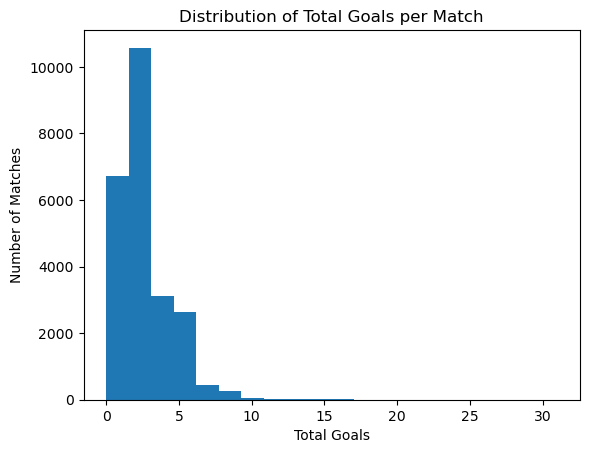

In [241]:
plt.hist(df["total_goals"], bins=20)
plt.xlabel("Total Goals")
plt.ylabel("Number of Matches")
plt.title("Distribution of Total Goals per Match")
plt.show()

In [243]:
df["goal_diff"] = df["home_team_score"] - df["away_team_score"]

In [245]:
df["result"] = df["goal_diff"].apply(lambda x: "Home Win" if x>0 else ("Away Win" if x<0 else "Draw"))

In [247]:
result_counts = df["result"].value_counts()

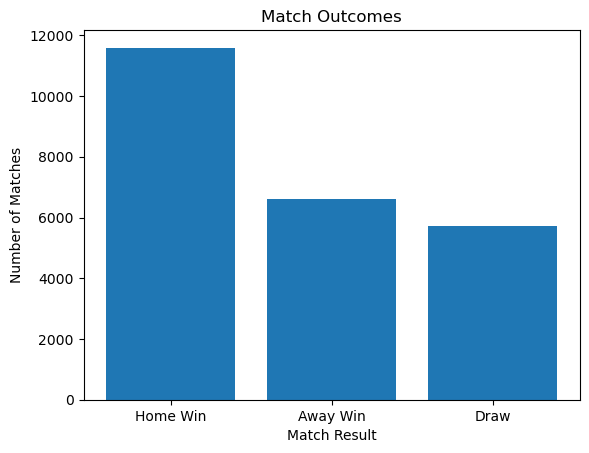

In [253]:
plt.bar(result_counts.index, result_counts.values)
plt.xlabel("Match Result")
plt.ylabel("Number of Matches")
plt.title("Match Outcomes")
plt.show()

In [255]:
df["year"] = df["date"].dt.year

In [257]:
matches_per_year = df.groupby("year").size()

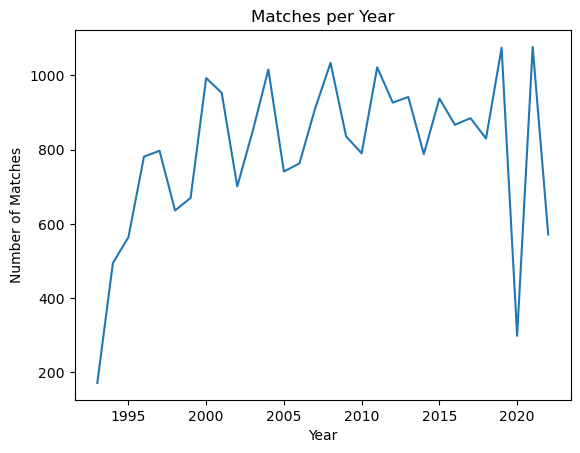

In [259]:
plt.plot(matches_per_year.index, matches_per_year.values)
plt.xlabel("Year")
plt.ylabel("Number of Matches")
plt.title("Matches per Year")
plt.show()

In [261]:
average_goals = df.groupby("year")["total_goals"].mean()

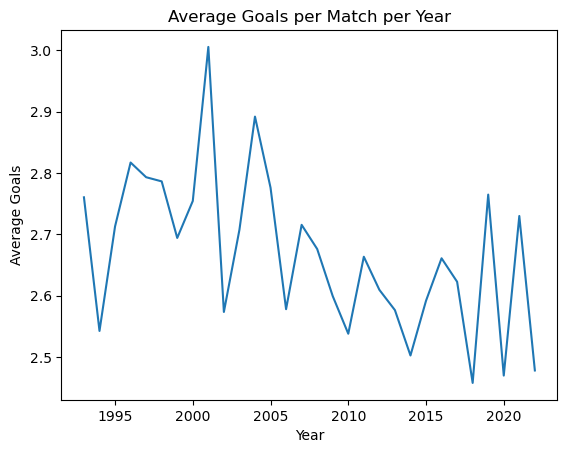

In [263]:
plt.plot(average_goals.index, average_goals.values)
plt.xlabel("Year")
plt.ylabel("Average Goals")
plt.title("Average Goals per Match per Year")
plt.show()

In [265]:
top_countries = df["country"].value_counts().head(10)

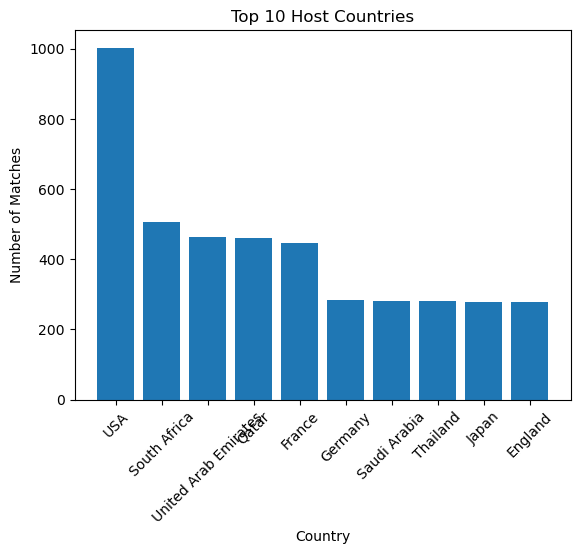

In [267]:
plt.bar(top_countries.index, top_countries.values)
plt.xlabel("Country")
plt.ylabel("Number of Matches")
plt.title("Top 10 Host Countries")
plt.xticks(rotation=45)
plt.show()

In [268]:
top_tournaments = df["tournament"].value_counts().head(10)

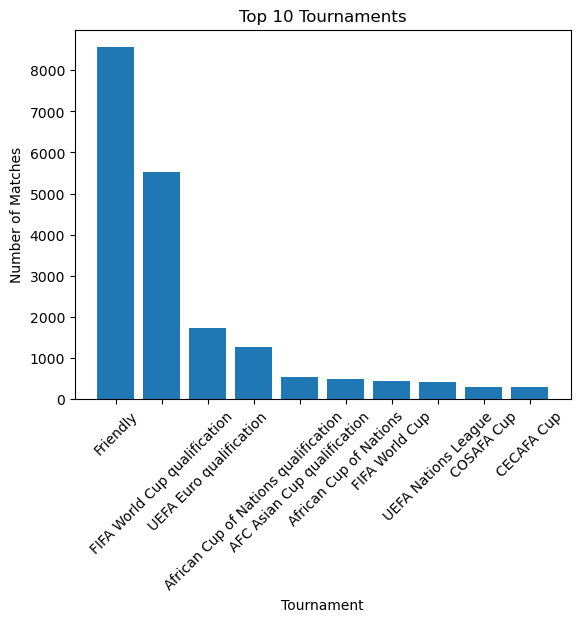

In [271]:
plt.bar(top_tournaments.index, top_tournaments.values)
plt.xlabel("Tournament")
plt.ylabel("Number of Matches")
plt.title("Top 10 Tournaments")
plt.xticks(rotation=45)
plt.show()

Regression target: total goals & Classification target: result

In [274]:
features = [
    "home_team_fifa_rank",
    "away_team_fifa_rank",
    "home_team_total_fifa_points",
    "away_team_total_fifa_points"
]

In [276]:
df_ml = df.dropna(subset=features + ["total_goals", "result"]).copy()

In [278]:
X = df_ml[features]

Regression target

In [281]:
y_reg = df_ml["total_goals"]

Classification target

In [284]:
y_clf = df_ml["result"] 

In [286]:
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X, y_reg, test_size=0.2, random_state=42)

In [288]:
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X, y_clf, test_size=0.2, random_state=42, stratify=y_clf)

In [290]:
reg_model = LinearRegression()

In [292]:
reg_model.fit(X_train_r, y_train_r)

LinearRegression()

In [294]:
y_pred_r = reg_model.predict(X_test_r)

In [296]:
mae = mean_absolute_error(y_test_r, y_pred_r)

In [298]:
rmse = mean_squared_error(y_test_r, y_pred_r, squared=False)

C:\Users\Neli\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [300]:
print("Regression Results:")
print("MAE:", mae)
print("RMSE:", rmse)

Regression Results:
MAE: 1.4369291764085947
RMSE: 1.8528829412002492


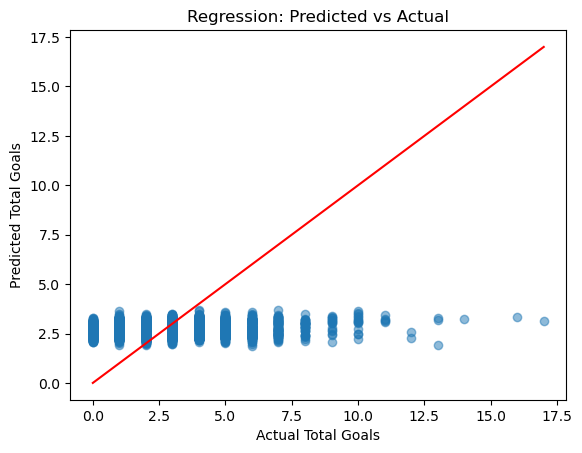

In [302]:
plt.scatter(y_test_r, y_pred_r, alpha=0.5)
plt.xlabel("Actual Total Goals")
plt.ylabel("Predicted Total Goals")
plt.title("Regression: Predicted vs Actual")
plt.plot([y_test_r.min(), y_test_r.max()], [y_test_r.min(), y_test_r.max()], color="red")
plt.show()

In [304]:
from sklearn.linear_model import LogisticRegression

In [306]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [308]:
clf_model = LogisticRegression(max_iter=500)

In [310]:
clf_model.fit(X_train_c, y_train_c)

LogisticRegression(max_iter=500)

In [312]:
y_pred_c = clf_model.predict(X_test_c)

In [314]:
acc = accuracy_score(y_test_c, y_pred_c)

In [316]:
print("Classification Accuracy:", acc)
print("\nClassification Report:\n", classification_report(y_test_c, y_pred_c))

Classification Accuracy: 0.5684430512016719

Classification Report:
               precision    recall  f1-score   support

    Away Win       0.52      0.54      0.53      1325
        Draw       0.00      0.00      0.00      1142
    Home Win       0.59      0.87      0.70      2318

    accuracy                           0.57      4785
   macro avg       0.37      0.47      0.41      4785
weighted avg       0.43      0.57      0.49      4785



C:\Users\Neli\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Neli\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Neli\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


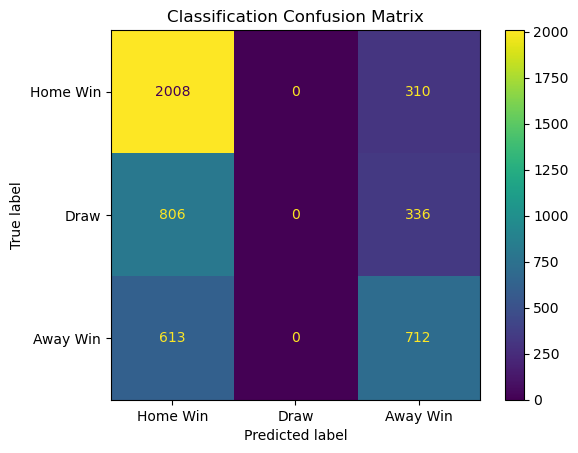

In [318]:
cm = confusion_matrix(y_test_c, y_pred_c, labels=["Home Win","Draw","Away Win"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Home Win","Draw","Away Win"])
disp.plot()
plt.title("Classification Confusion Matrix")
plt.show()

In [320]:
from sklearn.cluster import KMeans

In [322]:
from sklearn.preprocessing import StandardScaler

In [324]:
team_stats = df.groupby("home_team")[["home_team_fifa_rank","home_team_total_fifa_points"]].mean().dropna()

In [340]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(team_stats)

In [342]:
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

C:\Users\Neli\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [344]:
team_stats["cluster"] = clusters

In [346]:
team_stats.head(10)

,home_team_fifa_rank,home_team_total_fifa_points,cluster
home_team,,,
Afghanistan,157.527778,278.500000,4
Albania,76.572519,377.564885,3
Algeria,54.496855,418.943396,3
American Samoa,200.000000,161.235294,2
Andorra,165.721649,276.536082,4
Angola,86.806897,219.462069,1
Anguilla,204.230769,321.230769,4
Antigua and Barbuda,129.788732,215.408451,2
Argentina,6.794737,575.268421,3


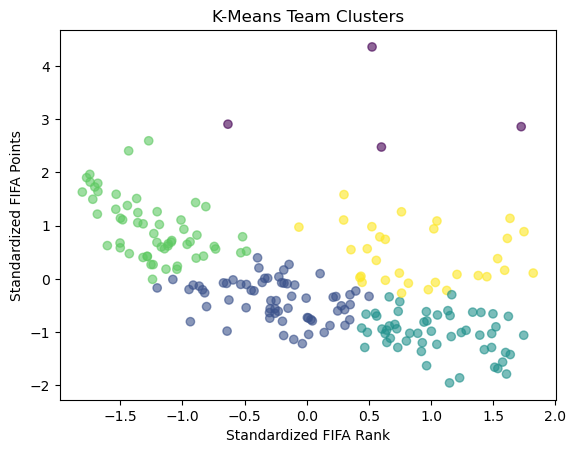

In [348]:
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=clusters, alpha=0.6)
plt.xlabel("Standardized FIFA Rank")
plt.ylabel("Standardized FIFA Points")
plt.title("K-Means Team Clusters")
plt.show()